In [3]:
# Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [5]:
hurricanes = pd.read_csv('data/hf071-01-hurricanes.csv')

In [8]:
hurricanes.head()

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


In [7]:
list(hurricanes.columns)

['code', 'start.date', 'end.date', 'number', 'name', 'ss', 'track', 'rf.max']

In [9]:
hurricanes.dtypes

code          object
start.date    object
end.date      object
number         int64
name          object
ss             int64
track         object
rf.max        object
dtype: object

- Convert date columns to date types
- Filter to category 5
- Calculate duration + add column

In [12]:
# Convert to date time
hurricanes['start.date'] = pd.to_datetime(hurricanes['start.date'])
hurricanes['end.date'] = pd.to_datetime(hurricanes['end.date'])

hurricanes.dtypes

code                  object
start.date    datetime64[ns]
end.date      datetime64[ns]
number                 int64
name                  object
ss                     int64
track                 object
rf.max                object
dtype: object

In [16]:
# Calculate Duration
hurricanes['duration'] = hurricanes['end.date'] - hurricanes['start.date']
hurricanes.head()

,code,start.date,end.date,number,name,ss,track,rf.max,duration
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1,1 days
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1,0 days
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd,0 days
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1,0 days
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1,0 days


In [30]:
(hurricanes.loc[hurricanes['ss'] == 5]
 .assign(duration = hurricanes.to_datetime(hurricanes['end.date'])- hurricanes.to_datetime(hurricanes['start.date'])))[['name','ss','duration']]

AttributeError: 'DataFrame' object has no attribute 'to_datetime'

In [22]:
# Filter to category 5
cat5 = hurricanes[hurricanes['ss'] == 5]
cat5

,code,start.date,end.date,number,name,ss,track,rf.max,duration
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3,0 days
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3,1 days
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3,1 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


In [23]:
count_cat5 = cat5.code.nunique()
count_cat5

4

([<matplotlib.axis.YTick at 0x7fc97a7d5220>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

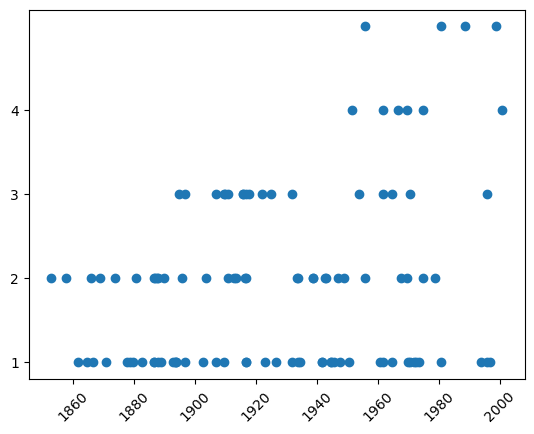

In [32]:
plt.scatter(hurricanes['start.date'], hurricanes['ss'])

plt.xticks(rotation = 45)
plt.yticks([1,2,3,4])